<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#行列と連立方程式" data-toc-modified-id="行列と連立方程式-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>行列と連立方程式</a></span><ul class="toc-item"><li><span><a href="#python-code" data-toc-modified-id="python-code-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>python code</a></span></li></ul></li><li><span><a href="#掃き出し" data-toc-modified-id="掃き出し-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>掃き出し</a></span></li><li><span><a href="#写像" data-toc-modified-id="写像-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>写像</a></span><ul class="toc-item"><li><span><a href="#一点からの写像" data-toc-modified-id="一点からの写像-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>一点からの写像</a></span></li><li><span><a href="#写像のポンチ絵の正体" data-toc-modified-id="写像のポンチ絵の正体-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>写像のポンチ絵の正体</a></span></li></ul></li><li><span><a href="#固有ベクトルの幾何学的意味" data-toc-modified-id="固有ベクトルの幾何学的意味-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>固有ベクトルの幾何学的意味</a></span><ul class="toc-item"><li><span><a href="#解答" data-toc-modified-id="解答-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>解答</a></span></li></ul></li><li><span><a href="#行列式の幾何学的意味" data-toc-modified-id="行列式の幾何学的意味-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>行列式の幾何学的意味</a></span></li><li><span><a href="#行列式が0の写像" data-toc-modified-id="行列式が0の写像-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>行列式が0の写像</a></span></li><li><span><a href="#全単射" data-toc-modified-id="全単射-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>全単射</a></span></li><li><span><a href="#課題" data-toc-modified-id="課題-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>課題</a></span></li></ul></div>

<br />

<div style="text-align: center;">
<font size="7">線形代数-写像</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/lafundamentals</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017-19 </font>
</div>





# 行列と連立方程式


大学の理系で必修なのは微積分と線形代数です．線形代数というと逆行列と固有値の計算がすぐに思い浮かぶでしょう．計算がややこしくてそれだけでいやになります．でも，行列の計算法は一連の手順で記述できるので，pythonでは微積分とおなじように一個のコマンドで片が付きます．それが3x3以上でも同じです．問題はその意味です．ここでは，線形代数の計算がpythonを使えばどれほど簡単にできるかを示すと共に，線形代数の基本となる概念についてスクリプトと描画を使って，直観的に理解することを目的とします．

先ずは連立方程式から入っていきます．中学の時に

$$
4x = 2
$$
というのを解きますよね．一般的には

$$
\begin {array}{rl}
ax &= b \\
x &= b/a
\end {array}
$$
と書けるというのは皆さんご存知のはず．これと同じようにして連立方程式を書こうというのが逆行列の基本．つまり

$$
\begin {array}{rrl}
2x\, + &5y &=7 \\
4x\, + &y &=5
\end {array}
$$
という連立方程式は，係数から作られる2x2行列を係数行列$A$，左辺の値で作るベクトルを$b$として，

$$
\begin {array}{rll}
Ax &= b & \\
x &= b/A &= A^{-1}b
\end {array}
$$
としたいわけです．


## python code

線形代数の問題をpythonで扱うには，scipyに用意されているlinalgパッケージを使うのが現在主流．numpyにある線形代数関数をすべてカバー(包含)しているから．

まずは行列
$$
\left[ \begin {array}{cc} 2&5\\ 4&1\end {array} \right]
$$
を作ります．

In [21]:
import numpy as np
from pprint import pprint
aa = np.array([[2,5], [4,1]])

pprint(aa)

array([[2, 5],
       [4, 1]])


pprintのimportと呼び出しの仕方は微妙なんで，
上で示した順番を守ってください．

で，次は$b$ ベクトル
$$
\left[ \begin {array}{c} 
7\\
5
\end {array} \right]
$$
です．

In [22]:
b = np.array([7,5])
pprint(b)

array([7, 5])


連立方程式の解(Solve a linear matrix equation, or system of linear scalar equations)を一発で求める関数は次の通りです．

In [23]:
import scipy.linalg as linalg
pprint(linalg.solve(aa,b))

array([1., 1.])


逆行列と$b$ の積から求めるのは次の通りです．

In [24]:
# 逆行列(matrix inverse)
inv_a = linalg.inv(aa)
print(inv_a)

[[-0.056  0.278]
 [ 0.222 -0.111]]


In [25]:
# 逆行列と，定数項(ordinate)の転置(transpose)との
t_b = np.transpose(b)
print(np.dot(inv_a,t_b))

[1. 1.]


pythonのarrayは横ベクトルということに注意してください．
行列に右から掛けるには，転置しておく必要があります．

# 掃き出し

係数行列$A$とベクトル$b$を足して作られる行列は拡大係数行列と呼ばれます．numpyでは，これは

In [26]:
ab = np.column_stack((aa,b))
pprint(ab)

array([[2, 5, 7],
       [4, 1, 5]])


として作られます．ここから行列の掃き出し操作をおこなうには,luというコマンドを使います．

In [27]:
P, L, U = linalg.lu(ab)
print("P=")
pprint(P)
print("L=")
pprint(L)
print("U=")
pprint(U)

P=
array([[0., 1.],
       [1., 0.]])
L=
array([[1. , 0. ],
       [0.5, 1. ]])
U=
array([[4. , 1. , 5. ],
       [0. , 4.5, 4.5]])


これは，下三角行列(Lower Triangle Matrix)と上三角行列(Upper Triangle Matrix)に分解(decompose)するコマンドです．この操作はLU分解と呼ばれます．$P$行列は置換(permutation)行列を意味します．luの出力は，前進消去が終わっただけの状態です．後退代入(back substitution)して得られる，reduced row echelon form(rref)にする方法は問題があるとして，numpyでは関数を用意してないようです．

rrefはsympyには用意されています．

In [28]:
from sympy import Matrix

Aex = Matrix([[2,5,7],[4,1,5]])
pprint(Aex)
Aex.rref()

Matrix([
[2, 5, 7],
[4, 1, 5]])


(Matrix([
 [1, 0, 1],
 [0, 1, 1]]),
 (0, 1))

# 写像

## 一点からの写像

次に，先ほどの行列による点の移動
$$
\left(
\begin{array}{c} 1 \\ 1 \end{array}
\right)
\xrightarrow{f:A}
\left(
\begin{array}{c} 7 \\ 5 \end{array}
\right)
$$
を2次元上のグラフで見てみましょう．

draw_projcetion_line_pointsは座標(x,y)を受け取り，
1. 位置p0(x,y)を作り，
1. 行列(aa)によって写像される位置p1を作ります．
1. p0に丸を赤色r(ed)で描き，
1. 同じように位置p1に青色b(lue)で丸を描きます．
1. もう一つ，p0からp1をつなぐlineを引きます．

さらに，表示範囲を0..7,0..5として軸をdraw_axesで書いています．

<!---
 ![LAFundamentalsplot2d1.png](figs/LAFundamentalsplot2d1.png)
-->

array([[2, 5],
       [4, 1]])


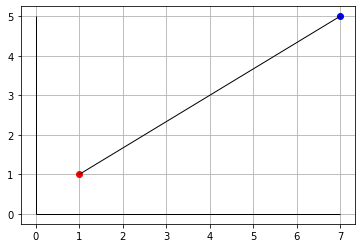

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def draw_projcetion_line_points(x,y):
    p0 = np.array([x,y])
    p1 = np.dot(aa,p0)

    plt.plot(p0[0],p0[1],'o',color='r')
    plt.plot(p1[0],p1[1],'o',color='b')
    plt.plot([p0[0],p1[0]],[p0[1],p1[1]],
             color='k', linestyle='-', linewidth=1)

def draw_axes(x_min,x_max,y_min,y_max):
    plt.hlines(0, x_min, x_max, color='k', linestyle='-',
               linewidth=1)
    plt.vlines(0, y_min, y_max, color='k', linestyle='-',
               linewidth=1)

aa = np.array([[2,5], [4,1]])
pprint(aa)
draw_projcetion_line_points(1,1)

draw_axes(0,7,0,5)

# plt.axes().set_aspect('equal', 'datalim')
plt.grid(b=None, which='major', axis='both')
plt.show()

逆行列は

In [31]:
inv_aa = linalg.inv(aa)
pprint(inv_aa)

array([[-0.056,  0.278],
       [ 0.222, -0.111]])


です．先ほどと逆に青から赤へたどる変換になっています．これが，連立方程式を解く様子をグラフで示しています．つまり，行列Aで示される変換によって求まる青点で示したベクトルb(7,5)を指す元の赤点を捜すというものです．答えは(1,1)となります．

## 写像のポンチ絵の正体

では，元の赤点をもう少しいろいろ取って，行列Aでどのような点へ写されるかを見てみましょう．

1. n=32で分割した円周上の点(x0,y0)を求めて，
1. draw_projcetion_line_pointsでそれぞれの点の写像

します．


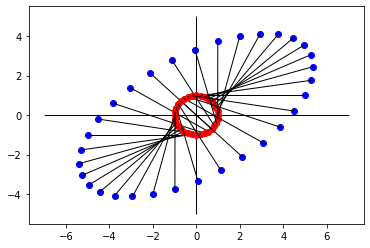

In [32]:
aa = np.array([[2,5], [4,1]])

div = 32
for i in range(0,div):
    theta = 2*np.pi/div*i
    x0 = np.sin(theta)
    y0 = np.cos(theta)
    # print('%10.5f-%10.5f' % (x,y))
    draw_projcetion_line_points(x0,y0)

draw_axes(-7,7,-5,5)

#plt.axes().set_aspect('equal', 'datalim')
plt.show()

できあがりの図を見てください．何やっているか分かります? 中心の赤点で示される円が，青点で示される楕円へ写されていることが分かるでしょうか．

線形代数の講義で，写像を示すときによく使われるポンチ絵を現実の空間で示すとこのようになります．ポンチ絵では，赤で示した$V$空間が青で示した$W$空間へ行列$A$によって写像され，それぞれの要素$v$が$w$へ移されると意図しています．

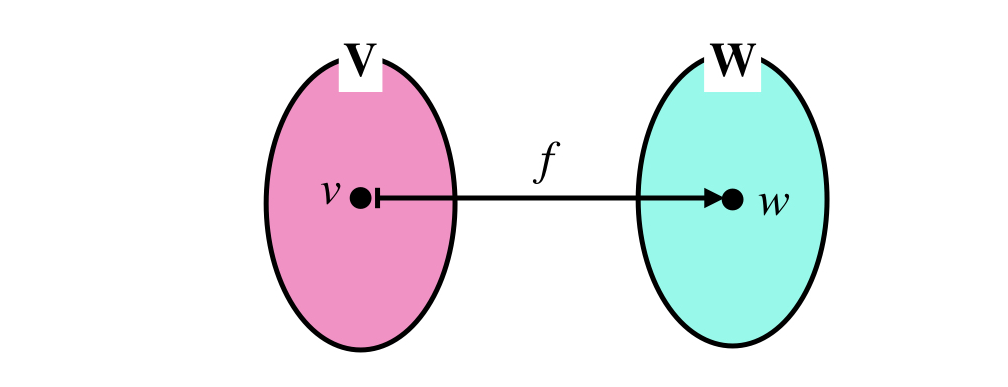

# 固有ベクトルの幾何学的意味

では，ここでクイズです．固有ベクトルは上のグラフの何処に対応するか?　ヒントは，
> 行列Aの固有値，固有ベクトルを$\lambda, x_0$とすると，
> $$
 A \,x_0 = \lambda \, x_0
 $$
> が成立する

です．

## 解答 


固有値$\lambda$，固有ベクトル$x_0$の関係式

$$
A \,x_0 = \lambda \, x_0
$$
を言葉で言い直すと，
>固有ベクトル$x_0$は変換行列$A$によって，自分の固有値倍のベクトル$\lambda x_0$に写されるベクトル
となります．つまり変換の図で言うと，
>変換しても方向が変わらない赤点（の方向）
となります．

固有値と固有ベクトルはpythonでは以下のeigコマンドで求まります．

In [33]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

np.set_printoptions(precision=3, suppress=True)

aa = np.array([[2,5], [4,1]])
pprint(aa)
#a = np.array([[3,2/3], [2/3,2]])
l,P = np.linalg.eig(aa)
pprint(l)
pprint(P)

array([[2, 5],
       [4, 1]])
array([ 6., -3.])
array([[ 0.781, -0.707],
       [ 0.625,  0.707]])


ここではeigで戻り値をl ($\lambda$(lambdaと書きます))，と$P$に代入しています．この後ろ側にある行列$P$の1列目で構成されるベクトルが固有値6に対応する固有ベクトル，2列目のベクトルが固有値-3に対応する固有ベクトルです．

これを取り出すのは次のようにします．

In [34]:
v0 = P[:,0]
v1 = P[:,1]
pprint(v0)
pprint(v1)

array([0.781, 0.625])
array([-0.707,  0.707])


これを書き加えた図を示します．ちゃんと固有ベクトルになってるでしょう．

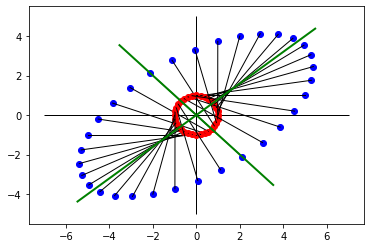

In [36]:
import matplotlib.pyplot as plt

def draw_eigen_vector(v, t):
    plt.plot([-t*v[0],t*v[0]], [-t*v[1],t*v[1]], 
             color='g', linestyle='-', linewidth=2)

div = 32
for i in range(0,div):
    theta = 2*np.pi/div*i
    x0 = np.sin(theta)
    y0 = np.cos(theta)
    # print('%10.5f-%10.5f' % (x,y))
    draw_projcetion_line_points(x0,y0)

draw_axes(-7,7,-5,5)

draw_eigen_vector(v0, 7)
draw_eigen_vector(v1, 5)

#plt.axes().set_aspect('equal', 'datalim')
plt.show()


おまけですが，行列の対角化は次のようにしてできます．


In [37]:
np.dot(np.dot(np.linalg.inv(P),aa),P)

array([[ 6.,  0.],
       [ 0., -3.]])

# 行列式の幾何学的意味


行列Aの行列式(determinant, $\left|A\right|$あるいはdet$A$と表記)はdetで求まります．

In [38]:
np.linalg.det(aa)

-17.999999999999996

では次のクイズ．先ほど求めた，行列Aの行列式は，どこに対応するでしょう?
以下の(1,0),(0,1)の点を変換した点に原点からベクトルを結んでその意味を説明してください．さらに，そのマイナスの意味は？．

array([[2, 5],
       [4, 1]])


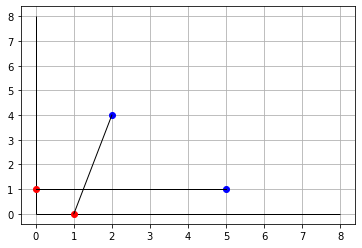

In [40]:
a = np.array([[2,5], [4,1]])
pprint(a)
draw_projcetion_line_points(1,0)
draw_projcetion_line_points(0,1)


draw_axes(0,8,0,8)

#plt.axes().set_aspect('equal', 'datalim')
plt.grid(b=None, which='major', axis='both')
plt.show()

# 行列式が0の写像

では，行列式が０になるというのはどういう状態でしょう? 次のような行列を考えてみましょう．
$$
\left[ \begin {array}{cc} 2&1\\ 4&2
\end {array} \right]
$$

この行列の行列式は

In [41]:
aa = np.array([[2,1],[4,2]])
np.linalg.det(aa)

0.0

です．この変換行列で，上と同じように写像の様子を表示させてみましょう．

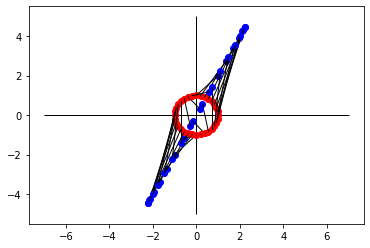

In [42]:
aa = np.array([[2,1], [4,2]])

div = 32
for i in range(0,div):
    theta = 2*np.pi/div*i
    x0 = np.sin(theta)
    y0 = np.cos(theta)
    # print('%10.5f-%10.5f' % (x,y))
    draw_projcetion_line_points(x0,y0)

draw_axes(-7,7,-5,5)

#plt.axes().set_aspect('equal', 'datalim')
plt.show()

今回の移動先の青点は直線となっています．つまり，determinantが0ということは，変換すると面積がつぶれるという事を意味しています．平面がひとつ次元を落として線になるということです．

次に，この行列の表わす写像によって原点(0,0)に写される元の座標を求めてみます．連立方程式に戻してみると
$$
\left[ \begin {array}{c} 2\,x+y\\ 4\,x+2\,y\end {array} \right] = \left[ \begin {array}{c} 0\\ 0\end {array} \right]
$$
となります．とよく見ると，1行目も2行目もおなじ式になっています．2次元正方行列で，行列式が0の時には必ずこういう形になり，直線の式となります．これを表示すると


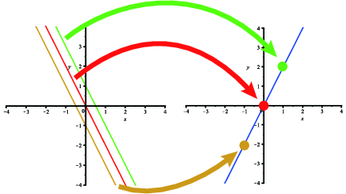

左図の赤線となります．この直線上の全ての点が[0,0]へ写されることを確認してください．また，緑の線上の点は全て[1,2]へ写されることが確認できます．


こうしてすべて調べていけば，左の平面上のすべて点は右の青の直線上へ写されることが分かります．今まで見てきた円と楕円とはまったく違った写像が，行列式が0の行列では起こっていることが分かると思います．右の青線を行列Aによる像(Image, Im$A$と表記)，左の赤線，つまり写像によって[0,0]へ写される集合を核(Kernel, Ker$A$と表記)と呼びます．

これをポンチ絵で描くと，次の通りです．


|像(Image) |
|:----|
|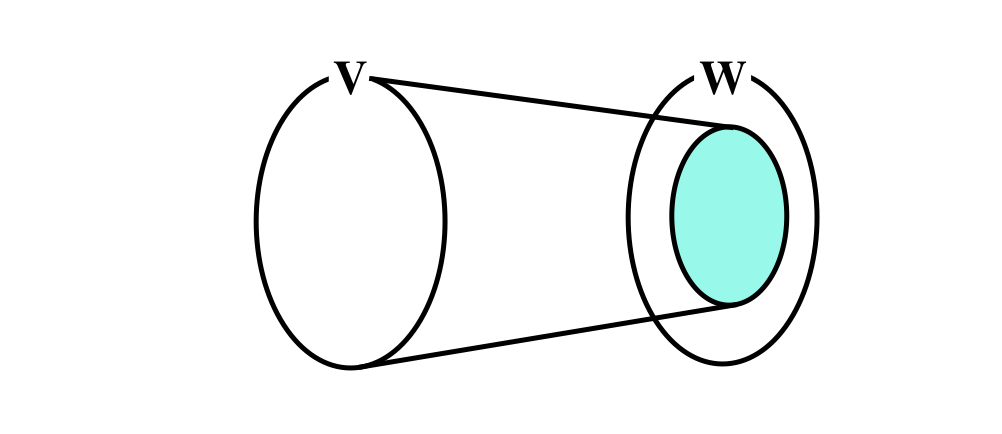

|核(Kernel) |
|:----|
|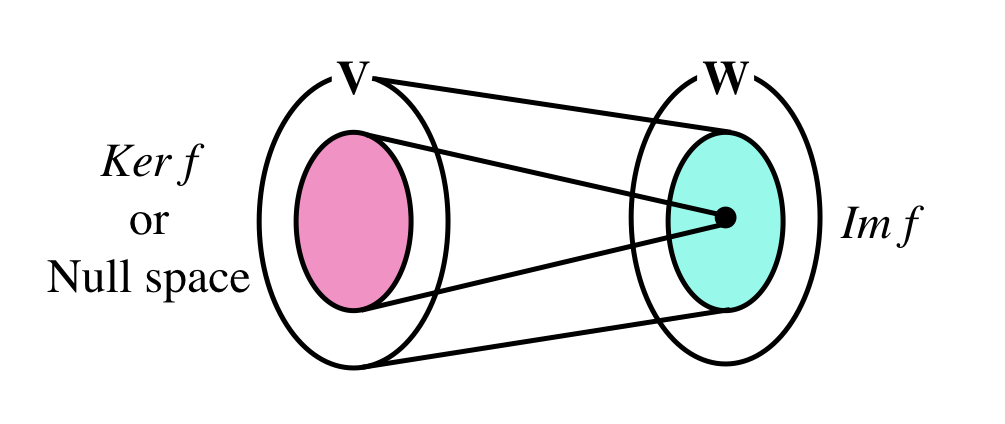

# 全単射

行列$A$による写像を$f$として，赤点に限らず元の点の集合を$V$, 移った先の点の集合を$W$とすると，

$$
f: V \rightarrow W
$$
と表記されます．$v,w$を$V,W$の要素としたとき，異なる$v$が異なる$w$に写されることを単射，全ての$w$に対応する$v$がある写像を全射と言います．全単射，つまり全射でかつ単射，だと要素は一対一に対応します．先ほどのAは全射でもなく，単射でもない例です．

行列式が0の場合の写像は単射ではありません．このとき，逆写像が作れそうにありません．これを連立方程式に戻して考えましょう．もともと，

$$
v = A^{-1} w
$$
の解$v$は点$w$が写像$A$によってどこから写されてきたかという意味を持ちます．逆写像が作れない場合は，連立方程式の解はパラメータをひとつ持った複数の解(直線)となります．これが係数行列の行列式が0の場合に，連立方程式の解が不定となる，あるいは像がつぶれるという関係です．

行列の次元が高い場合には，いろいろなつぶれかたをします．行列の階数(rank)と次元(dimension)は

In [43]:
print(np.linalg.matrix_rank(aa))
print(aa.shape)

1
(2, 2)


で求まります．

Aをm行n列の行列とするとき，
>Rank(A) = Dimension (Im A)

>Dimension (Ker A) = n - Rank(A) 

が成立し，これを次元定理といいます．
全射と単射の関係は，下の表のような一変数の方程式での解の性質の拡張と捉えることができます．

|呼び名|条件|意味|
|:----|:----|:----|
|一意|$a<>0$|解は$x=b/a$のみ|
|不定|$a=0, b=0$|解は無数 |
|不能|$a=0, b<>0$|解は存在しない|
||Table: 代数方程式$a x =b$の解の存在性．

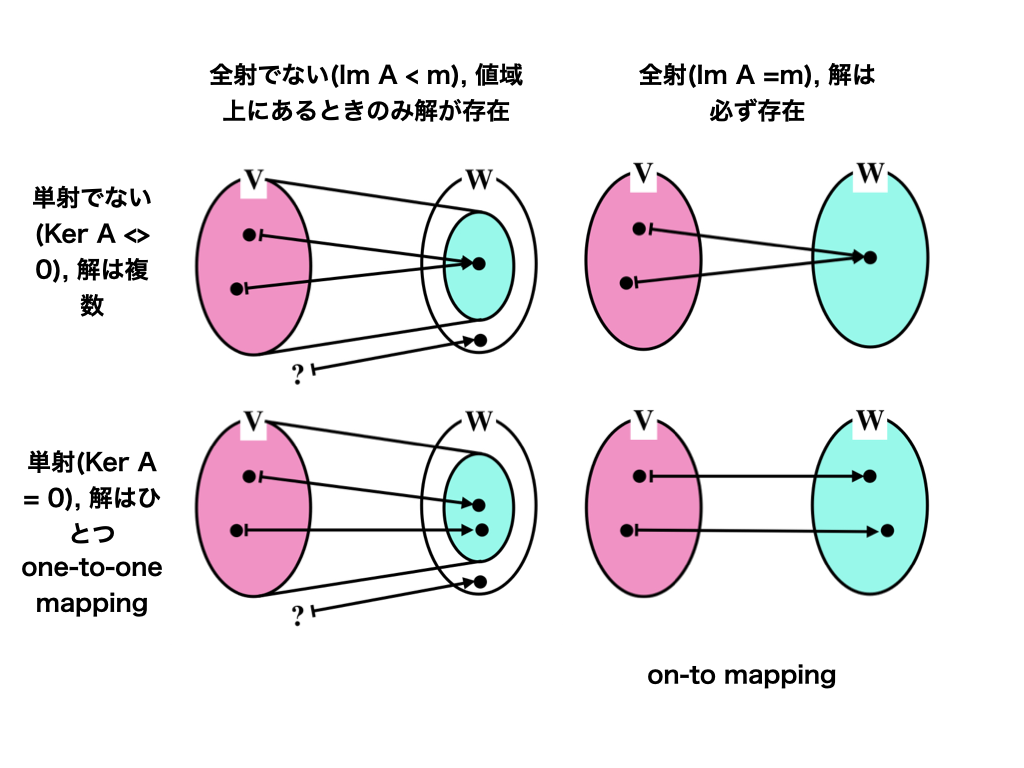

Table: m x n行列Aの全射と単射を示すポンチ絵．

# 課題


下の図は
$$A\, = \, \left[ \begin {array}{cc} 6 & 2\\ 2& 4\end {array} \right]$$

を用いて変換される像を表わしている．この絵をpythonで描画せよ．また，この行列の固有値，行列式が何処に対応するか説明せよ．また，固有ベクトルの方向を記せ．(2007年度期末試験改)

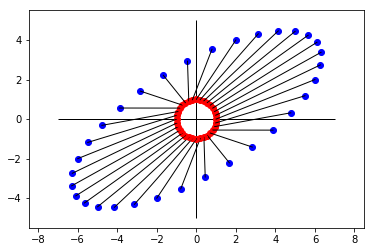

